<a href="https://colab.research.google.com/github/kushasupaya/cof_featurization_ml/blob/main/Preprocessing_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
import matplotlib.pyplot as plt

# Ignore all warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("features_5000.csv")
X = data.drop(data.columns[[0]], axis =1 )
X.head()
X.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 335 columns):
 #    Column                                Dtype  
---   ------                                -----  
 0    MagpieData minimum Number             float64
 1    MagpieData maximum Number             float64
 2    MagpieData range Number               float64
 3    MagpieData mean Number                float64
 4    MagpieData avg_dev Number             float64
 5    MagpieData mode Number                float64
 6    MagpieData minimum MendeleevNumber    float64
 7    MagpieData maximum MendeleevNumber    float64
 8    MagpieData range MendeleevNumber      float64
 9    MagpieData mean MendeleevNumber       float64
 10   MagpieData avg_dev MendeleevNumber    float64
 11   MagpieData mode MendeleevNumber       float64
 12   MagpieData minimum AtomicWeight       float64
 13   MagpieData maximum AtomicWeight       float64
 14   MagpieData range AtomicWeight         float64
 15   Ma

In [ ]:
all_prop = pd.read_csv(r'properties_5000_cofs.csv')

#  saving the target properties in Y.
# y = all_prop[[' deliverable capacity [v STP/v]']]

y = all_prop[[' deliverable capacity [v STP/v]',' heat desorption low P [kJ/mol]',' absolute methane uptake low P [mol/kg]']]
print(y)

       deliverable capacity [v STP/v]   heat desorption low P [kJ/mol]  \
0                          190.738960                         12.20344   
1                          122.863674                          8.06201   
2                          120.791832                          7.89099   
3                          170.199456                         10.45917   
4                          122.314002                          8.41180   
...                               ...                              ...   
4995                       110.700840                          6.72745   
4996                       154.615482                          9.68130   
4997                       139.834692                          8.10008   
4998                       184.927168                         11.15751   
4999                       175.569280                          9.68132   

       absolute methane uptake low P [mol/kg]  
0                                    4.267463  
1              

In [ ]:
all_prop.info(1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 54 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Unnamed: 0                                                    5000 non-null   int64  
 1   dimensions                                                    5000 non-null   int64  
 2    bond type                                                    5000 non-null   object 
 3    name                                                         5000 non-null   object 
 4    void fraction [widom]                                        5000 non-null   float64
 5    supercell volume [A^3]                                       5000 non-null   float64
 6    density [kg/m^3]                                             5000 non-null   float64
 7    heat desorption high P [kJ/mol]                              5000 no

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_features =X.columns


In [ ]:
#1 try

numeric_transformer1 = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=0.99))
])

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer1, numeric_features)
])


In [ ]:

#2 try
numeric_transformer2 = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler()),
    ('poly',PolynomialFeatures(degree=1)),
])

preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer2, numeric_features)
])

In [ ]:
#3 try
numeric_transformer3 = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler()),
    ('poly',PolynomialFeatures(degree=1)),
    ('pca',PCA(n_components=0.99))
])

preprocessor3 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer3, numeric_features)
])

In [ ]:
model1 = Pipeline(steps=[
    ("preprocessor",preprocessor1),
    ('regressor', RandomForestRegressor())
])

model2 = Pipeline(steps=[
    ("preprocessor",preprocessor2),
    ('regressor', RandomForestRegressor())
])

model3 = Pipeline(steps=[
    ("preprocessor",preprocessor3),
    ('regressor', RandomForestRegressor())
])

In [ ]:
model1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.99))]),
                                                  Index(['MagpieData minimum Number', 'MagpieData maximum Number',
       'MagpieData range Number', 'MagpieData mean Number',
       'MagpieData avg_dev Number', 'MagpieData mode Number',
       'M...
       'MagpieData range MendeleevNumber', 'MagpieData mean MendeleevNumber',
       ...
       'rdf [19.00000 - 19.10000]A', 'rdf [19.10000 - 19.20000]A',
       'rdf [19.20000 - 19.30000]A', 'rdf [19.30000 - 19.40000]A',
       'rdf [19.40000 - 19.50000]A', 'rdf [19.50000 - 19.60000]A',
       'rdf [19.60000 - 19.70000]A', 'rdf [19.70000 - 19.80000]A',
       'rdf [19.80000 - 19.90000]A', 'rdf [19.90000 - 20.00000]A'],
      dtype='object', length=335))])),
                ('regressor', RandomForestRegressor())])

In [ ]:
model2.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=1))]),
                                                  Index(['MagpieData minimum Number', 'MagpieData maximum Number',
       'MagpieData range Number', 'MagpieData mean Number',
       'MagpieData avg_dev Number', 'MagpieData mode Num...
       'MagpieData range MendeleevNumber', 'MagpieData mean MendeleevNumber',
       ...
       'rdf [19.00000 - 19.10000]A', 'rdf [19.10000 - 19.20000]A',
       'rdf [19.20000 - 19.30000]A', 'rdf [19.30000 - 19.40000]A',
       'rdf [19.40000 - 19.50000]A', 'rdf [19.50000 - 19.60000]A',
       'rdf [19.60000 - 19.70000]A', 'rdf [19.70000 - 19.80000]A',
       'rdf [19.80000 - 19.90000]A', 'rdf [19.90000 - 20.00000]A'],
      dtype='object', length=335))])),
                ('regressor', RandomForestRegressor())])

In [ ]:
model3.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=1)),
                                                                  ('pca',
                                                                   PCA(n_components=0.99))]),
                                                  Index(['MagpieData minimum Number', 'MagpieData maximum Number',
       'MagpieData range Number', 'MagpieData mean Number',
       'MagpieData av...
       'MagpieData range MendeleevNumber', 'MagpieData mean MendeleevNumber',
       ...
       'rdf [19.00000 - 19.10000]A', 'rdf [19.10000 - 19.20000]A',
       'rdf [19.20000 - 19.30000]A', 'rdf [19.30000 - 19.40000]A',
       'rdf [19.40000 - 19.50000]A', 'rdf [19.50000 - 19.60000]A',
       'rdf [19.60000 - 19.70000]A', 'rdf [19.70000 - 19.80000]A',
       'rdf [19.80000 - 19.90000]A', 'rdf [19.90000 - 20.00000]A'],
      dtype='object', length=335))])),
                ('regressor', RandomForestRegressor())])

In [ ]:
predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(np.sqrt(mse))

23.88307849617616


In [ ]:
#single values

predictions = model1.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
maeval = mean_absolute_error(y_test, predictions)

print(mse_m1, r2, maeval)



47.89251508303403 0.9361388493459313 4.652267037666585


16.162150054294774 0.8429538156569998 1.8251544125322228


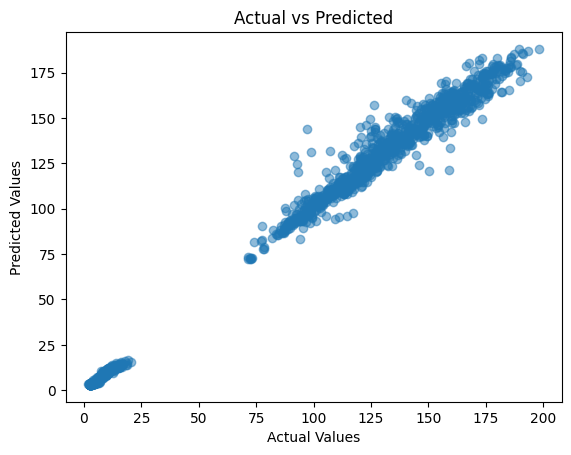

In [ ]:
#multiple values
predictions = model1.predict(X_test)
mse_m1 = mean_squared_error(y_test, predictions)
r2_m1 = r2_score(y_test, predictions)
maeval = mean_absolute_error(y_test, predictions)

print(mse_m1, r2_m1, maeval)

plt.scatter(y_test, predictions, alpha=0.5, cmap='viridis')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()

7.554716050593261 0.89344247687101 1.263548380034586


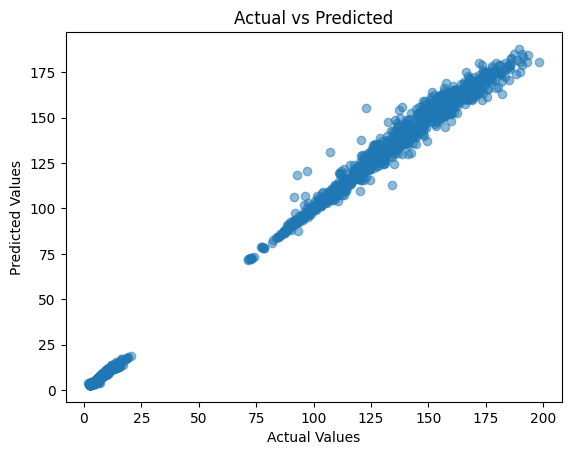

In [ ]:
predictions = model2.predict(X_test)
mse_m2 = mean_squared_error(y_test, predictions)
r2_m2 = r2_score(y_test, predictions)
maeval = mean_absolute_error(y_test, predictions)
print(mse_m2, r2_m2, maeval)

plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

16.5284349107251 0.8393569064752743 1.8393778135867906


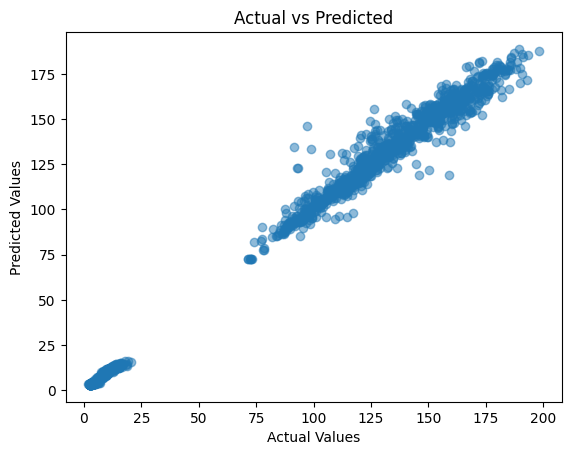

In [ ]:
predictions = model3.predict(X_test)
mse_m3 = mean_squared_error(y_test, predictions)
r2_m3 = r2_score(y_test, predictions)
maeval = mean_absolute_error(y_test, predictions)
print(mse_m3, r2_m3, maeval)

plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

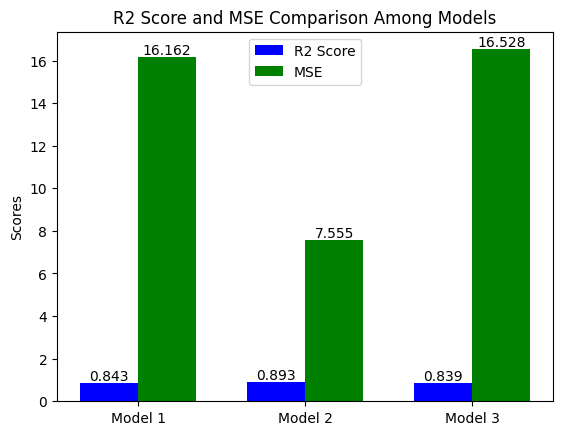

In [ ]:
r2_scores = [r2_m1, r2_m2, r2_m3]
mse_values = [mse_m1, mse_m2, mse_m3]

model_names = ['Model 1', 'Model 2', 'Model 3']

fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(model_names))

# Plotting R2 scores
bars_r2 = ax.bar(index, r2_scores, bar_width, label='R2 Score', color='blue')

# Plotting MSE values
bars_mse = ax.bar(index + bar_width, mse_values, bar_width, label='MSE', color='green')

ax.set_ylabel('Scores')
ax.set_title('R2 Score and MSE Comparison Among Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_names)
ax.legend()
# Adding labels and title
def autolabel(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

autolabel(bars_r2)
autolabel(bars_mse)

# Display the plot
plt.show()
